# Organoid Single Image Example Workflow

This notebook demonstrates each step of the workflow applied to the organoid dataset.

To run this notebook, you need to place an organoid image in a folder named `Organoids` under a `data` folder in the root of this repository (or adjust the path accordingly).

The conda environment used for this notebook can be created following the instructions in the [README.md](README.md) file. But in short, we need an environment with the [devbio-napari plugin](https://github.com/haesleinhuepf/devbio-napari).

If you want to run the workflow for multiple images, please check the [Batch_processing_workflow.ipynb](Batch_processing_workflow.ipynb) notebook.

## Import libraries

In [1]:
from skimage.io import imread
import napari_simpleitk_image_processing as nsitk
import pyclesperanto_prototype as cle
import pandas
from napari_skimage_regionprops import regionprops_table, get_table
import napari
from pathlib import Path

## Open napari

In [2]:
viewer = napari.Viewer()

Assistant skips harvesting pyclesperanto as it's not installed.


## Read image and add it to the viewer

In [3]:
image_path = Path("../../data/Organoids/Org43_1.tiff") # replace this with your image path
image = imread(image_path) 
viewer.add_image(image, name=image_path.stem)

<Image layer 'Org43_1' at 0x265b91ec7c0>

## Apply Laplacian of Gaussian Filter

Parameters:
- sigma = 1

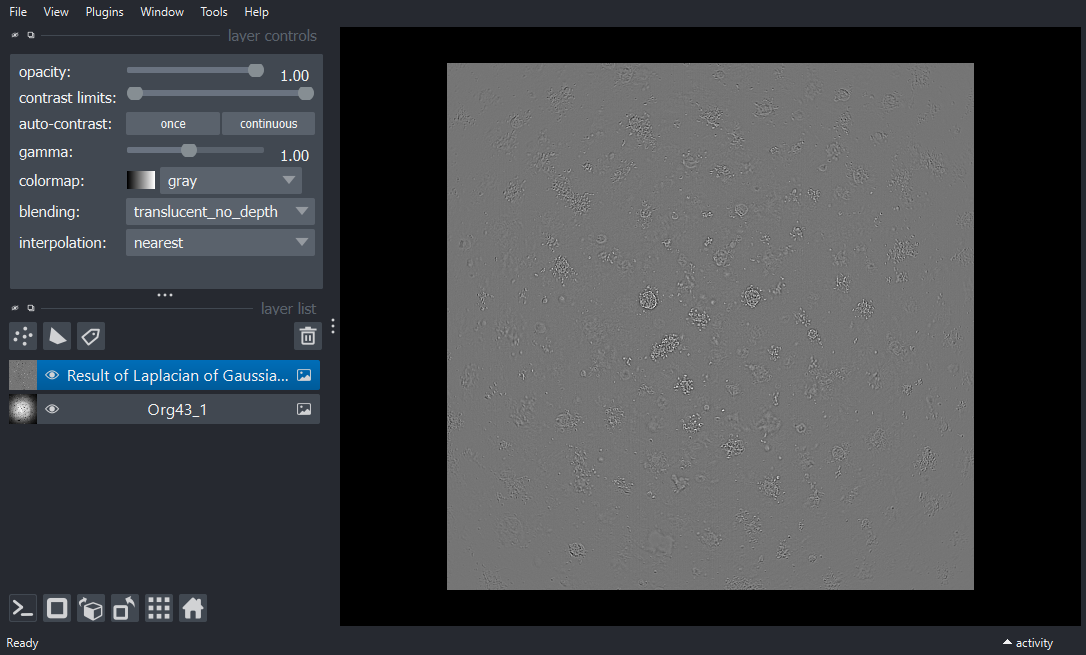

In [4]:
image1_L = nsitk.laplacian_of_gaussian_filter(image, 1.0)
viewer.add_image(
    image1_L, name='Result of Laplacian of Gaussian (n-SimpleITK)')
napari.utils.nbscreenshot(viewer)

## Apply Standard Deviation Filter

Parameters:
- sigma_x = 1
- sigma_y = 1
- sigma_z = 0

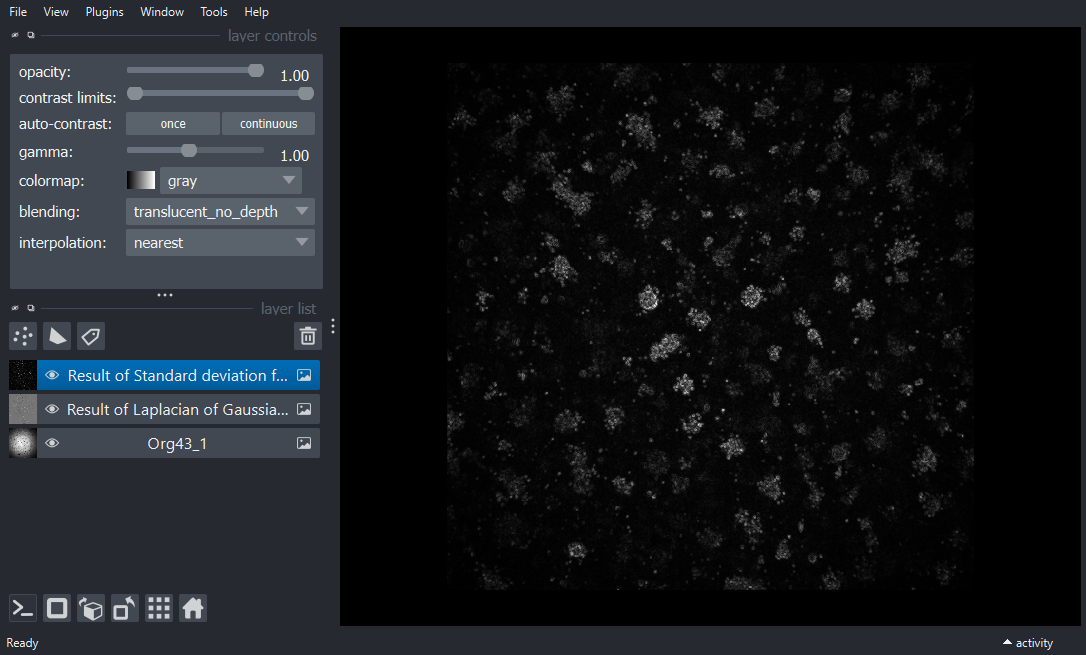

In [5]:
image2_S = nsitk.standard_deviation_filter(image1_L, 1, 1, 0)
viewer.add_image(
    image2_S, name='Result of Standard deviation filter (noise, n-SimpleITK)')
napari.utils.nbscreenshot(viewer)

## Apply Threshold Otsu

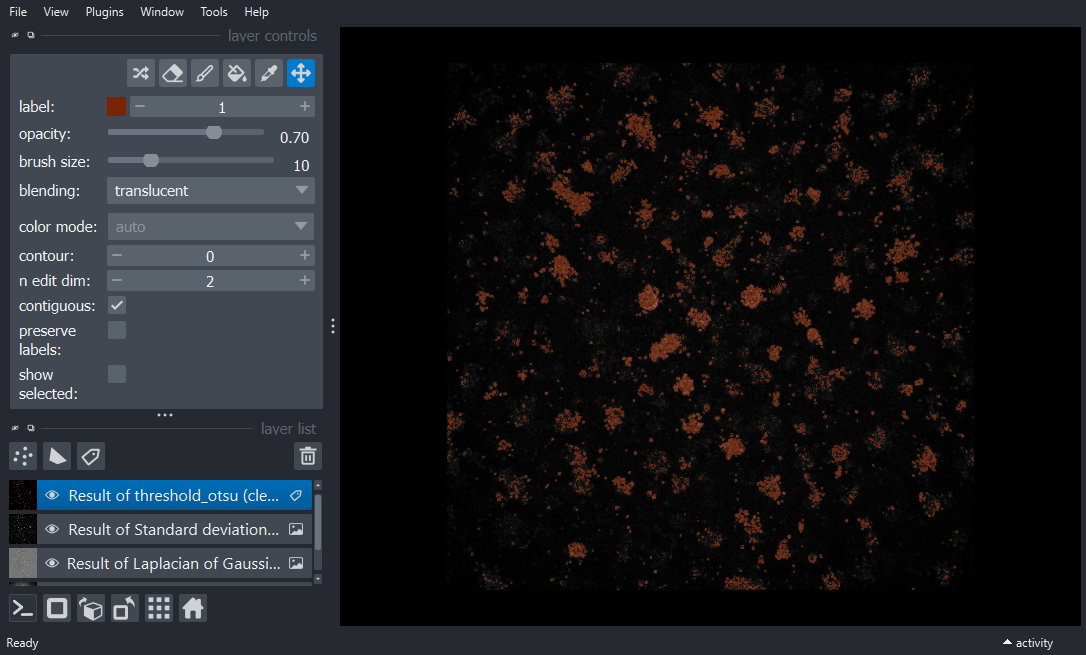

In [6]:
image3_to = cle.threshold_otsu(image2_S)
viewer.add_labels(image3_to, name='Result of threshold_otsu (clesperanto)')
napari.utils.nbscreenshot(viewer)

## Apply Closing Labels

Parameters:
- radius = 1

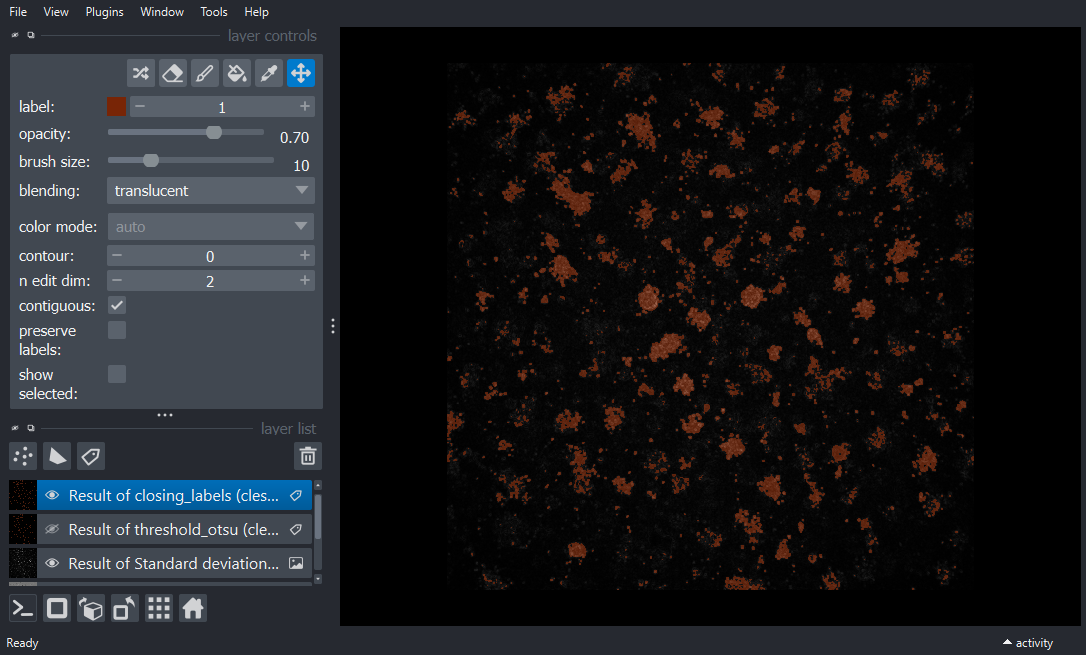

In [7]:
image4_cl = cle.closing_labels(image3_to, None, 1.0)
viewer.add_labels(image4_cl, name='Result of closing_labels (clesperanto)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Apply Binary Fill Holes

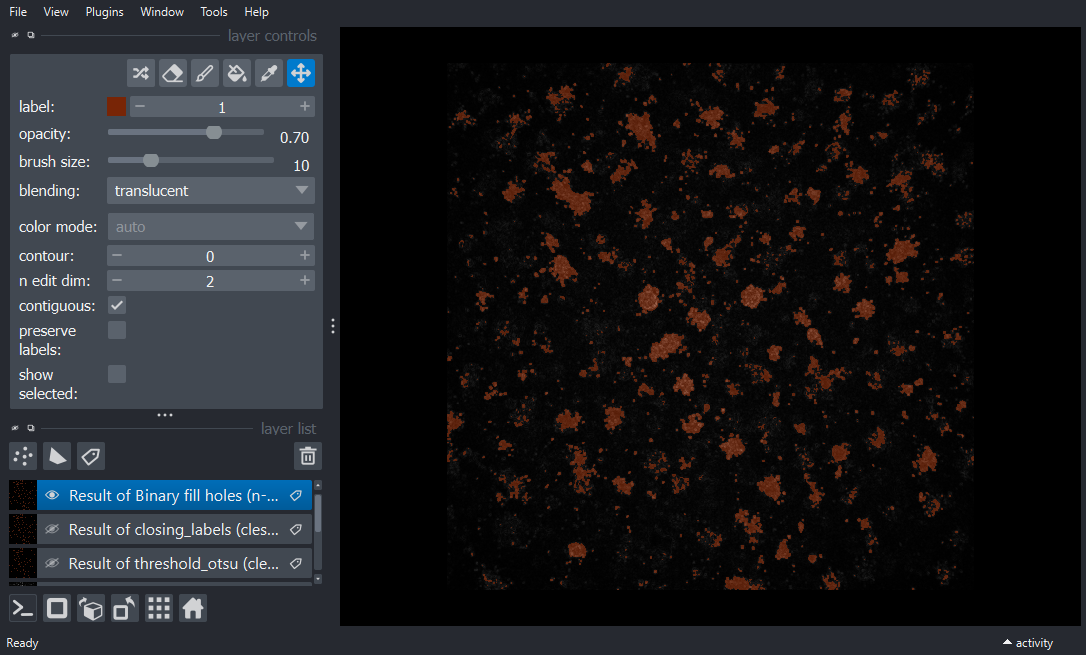

In [8]:
image5_B = nsitk.binary_fill_holes(image4_cl)
viewer.add_labels(image5_B, name='Result of Binary fill holes (n-SimpleITK)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Apply Connected Components Labeling

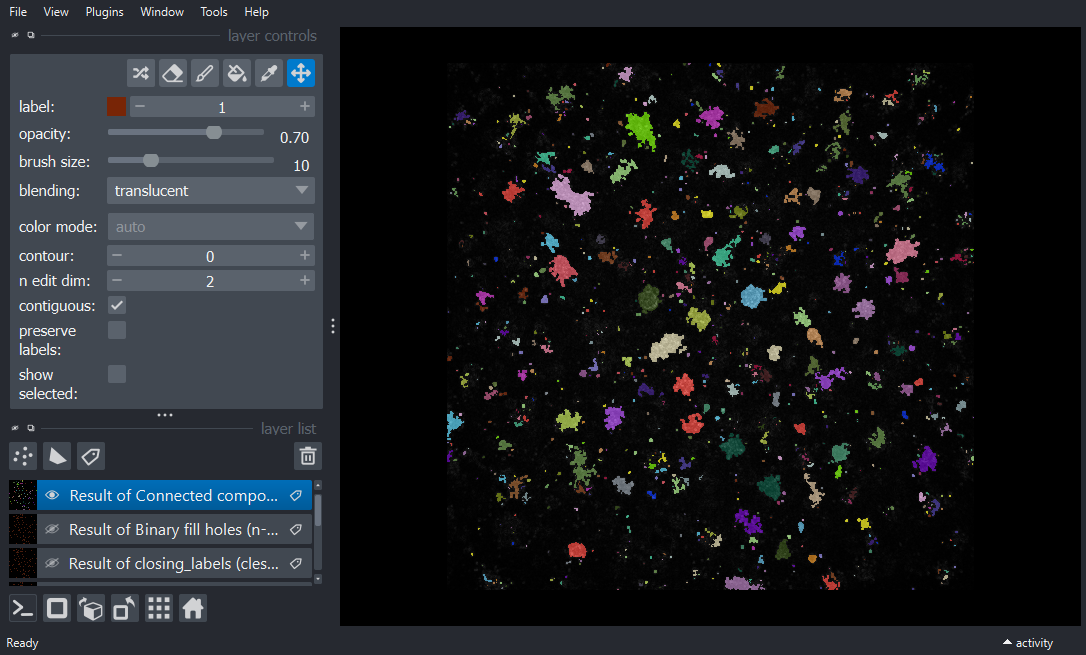

In [9]:
image6_C = cle.label(image5_B)
viewer.add_labels(
    image6_C, name='Result of Connected component labeling (clesperanto)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Apply Exclude Small Labels

Parameters:
- min_size = 300

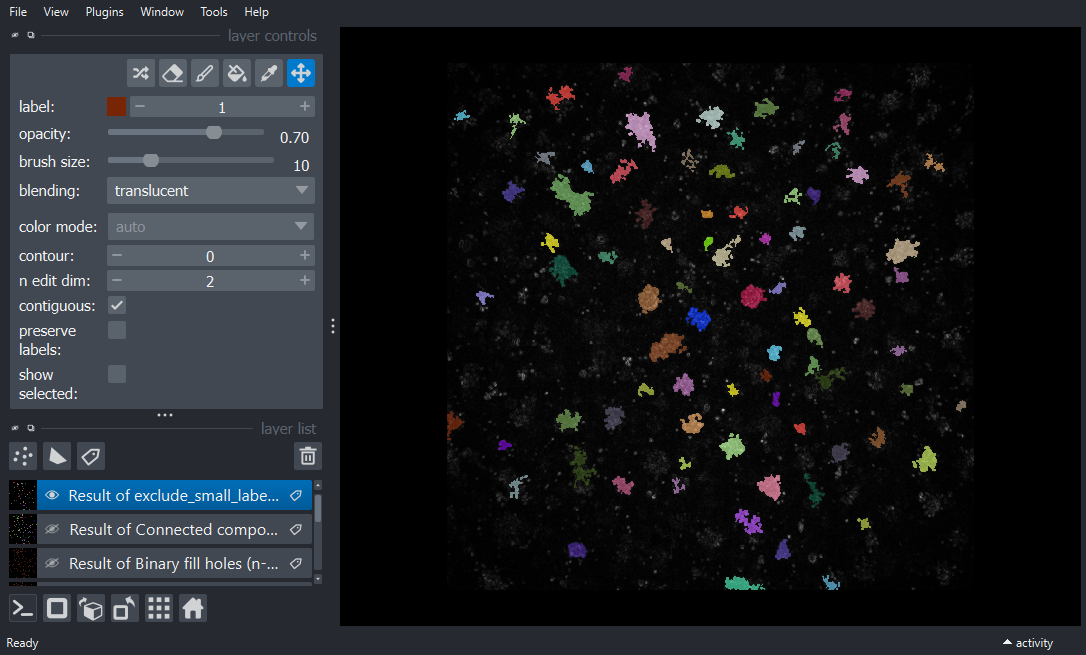

In [10]:
image7_esl = cle.exclude_small_labels(image6_C, None, 300.0)
viewer.add_labels(
    image7_esl, name='Result of exclude_small_labels (clesperanto)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Apply Exclude Labels on Edges

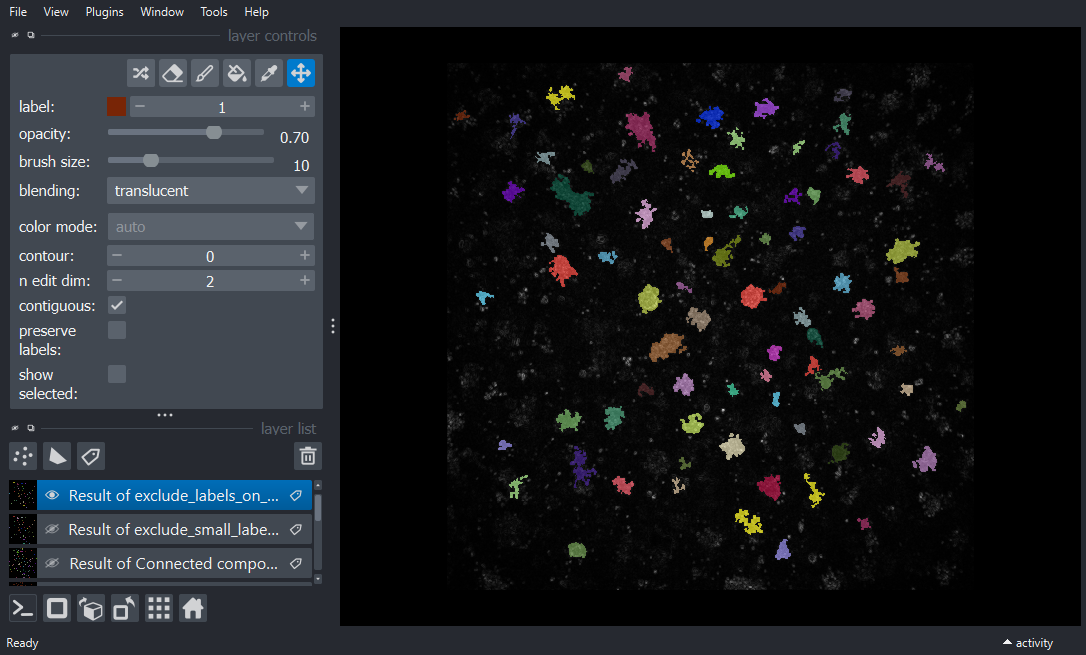

In [11]:
image8_eloe = cle.exclude_labels_on_edges(image7_esl)
viewer.add_labels(
    image8_eloe, name='Result of exclude_labels_on_edges (clesperanto)')
viewer.layers[-2].visible = False
napari.utils.nbscreenshot(viewer)

## Show Labels over Original Image

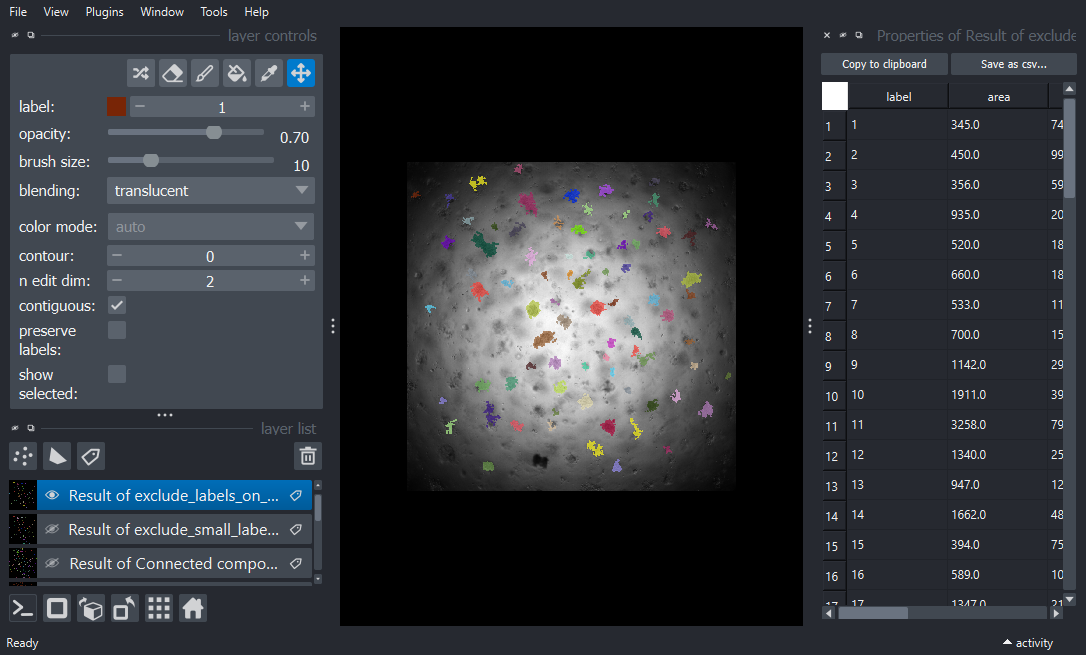

In [14]:
viewer.layers[1].visible = False
viewer.layers[2].visible = False
napari.utils.nbscreenshot(viewer)

## Extract Area and Other Size-related Features

In [13]:
regionprops_table(
    image,
    image8_eloe,
    size=True,
    intensity=False,
    napari_viewer=viewer,
)
table = pandas.DataFrame(get_table(viewer.layers[-1], viewer).get_content())
table

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


label    area  bbox_area  equivalent_diameter  convex_area  index
0       1   345.0      748.0            20.958713        488.0      1
1       2   450.0      999.0            23.936537        644.0      2
2       3   356.0      594.0            21.290216        432.0      3
3       4   935.0     2070.0            34.503318       1348.0      4
4       5   520.0     1872.0            25.731004       1107.0      5
..    ...     ...        ...                  ...          ...    ...
74     75   580.0     1056.0            27.174969        766.0     75
75     76   452.0      729.0            23.989670        557.0     76
76     77  1491.0     2754.0            43.570634       1990.0     77
77     78   546.0     1677.0            26.366433       1073.0     78
78     79   306.0      528.0            19.738574        364.0     79

[79 rows x 6 columns]